# Machine Learning Basics

## *Bogdan Bošković*


# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

a. The sample size $n$ is extremely large, and the number of predictors $p$ is small.  
b. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.  
c. The relationship between the predictors and response is highly non-linear.  
d. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high  

**ANSWER:**  

**a.** **Flexible**. With a large sample size, we can afford to use more flexible methods, as we have enough data to accurately fit the model. The small number of predictors in this case would decrease the risk of overfitting.   
**b.** **Inflexible**. With a small sample size, we can't afford to use flexible methods, as there isn't enough data available to accurately fit the model. The large number of predictors in this case would   
**c.** **Flexible**. With a highly non-linear relationship we need to use more flexible methods, as inflexible methods cannot capture the non-linear relationship.  
**d.** **Inflexible**. With a high variance of the error terms we can't afford to use flexible methods, as they will overfit the data.  

---

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER:**

**a.** ***CEO salary:***  
i. **Regression.** This is not a problem in which we are trying to classify the data into groups, but rather infer the relationship between the predictors and the response.  
ii. **Inference.** We are interested in understanding which factors affect CEO salary, which is an inference problem.  
iii. $n = 500$, $p = 3$, where the predictors are *profit*, *number of employees*, and *industry*.  
  
**b.** ***Product success:***  
**i.** **Classification (likely logistic regression).** Here, we can essentially classify projects into a binary pair of categories "success" and "failure", and train a classifier to determine which category the given product falls into.  
**ii.** **Prediction.** The problem statement here does not indicate any desire for inferring an underlying relationship between the predictors and the response, rather it simply states that the aim is to predict whether the product will be successful, given the set of predictors.  
**iii.** $n = 20$, $p = 13$, where the predictors are *price charged for the product*, *marketing budget*, *competition price*, and ten other variables.  

**c.** **US Dollar:**  
**i.** **Regression.** This is clearly not a classification problem, but rather a regression problem, as we are trying to predict a value.  
**ii.** **Prediction.** We are not interested in inferring the relationship between the predictors and the response, but rather in predicting the response given the predictors.  
**iii.** $n = 52$ (weeks), $p = 3$, where the predictors are *% change in the US market*, *% change in the British market*, and *% change in the German market*.  

---

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [98]:
import numpy as np
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

**a.** The Euclidean distance between each observation and the test point is calculated below:

In [18]:
euclid = np.linalg.norm(X - np.array([0, 0, 0]), axis=1)
print(euclid)

[3.         2.         3.16227766 2.23606798 1.41421356 1.73205081]


The distances are as follows:  

| Obs. | Distance     | $y$   |
|------|--------------|-------|
| **1**| 3            | Red   |
| **2**| 2            | Red   |
| **3**| 3.16227766   | Red   |
| **4**| 2.23606798   | Blue  |
| **5**| 1.41421356   | Blue  |
| **6**| 1.73205081   | Red   |

**b.** With $K=1$, our prediction is **blue**. This is because the nearest neighbor to the test point is observation 5, which has a response of **blue**.

**c.** With $K=3$, our prediction is **red**. This is because the three nearest neighbors to the test point are observations 2, 5, and 6, which have responses of **red**, **blue**, and **red**, respectively. Since two of the three nearest neighbors have a response of **red**, we predict that the test point will be a conformist have a response of **red**.

**d.** If the Bayes decision boundary is highly non-linear, then optimal $K$ value should be on the small side, since a large $K$ value would introduce a huge amount of bias in such a scenario. Keeping $K$ small would allow the model to be more flexible, and thus better fit the data.

---

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**a. KNN implementation:**  

In [96]:
class Knn:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y        

    # predict the label of a single point
    def predict_one(self, x):
        # Calculate the distance from each vector in x to the training data
        distances = np.linalg.norm((self.X_train - x), axis=1)
        # get the K closest neighbors
        indices = np.argsort(distances)[:self.k]
        # get the labels of the closest neighbors
        y_hat = self.y_train[indices]
        # get the most common label
        values, counts = np.unique(y_hat, return_counts=True)
        y_hat = values[np.argmax(counts)]
        # return the prediction for this point
        return y_hat
    
    def predict(self, X_new):
        # get the predictions for each point
        y_hat = [self.predict_one(x) for x in X_new]
        return y_hat        

**b. Loading the datasets:**

In [99]:
import pandas as pd, time

X_train_low = pd.read_csv('A2_X_train_low.csv').values
y_train_low = pd.read_csv('A2_y_train_low.csv').values
X_test_low = pd.read_csv('A2_X_test_low.csv').values
y_test_low = pd.read_csv('A2_y_test_low.csv').values

X_train_high = pd.read_csv('A2_X_train_high.csv').values
y_train_high = pd.read_csv('A2_y_train_high.csv').values
X_test_high = pd.read_csv('A2_X_test_high.csv').values
y_test_high = pd.read_csv('A2_y_test_high.csv').values

# Reshape the target variable arrays to one dimension
# took me a lot of troubleshooting to figure this out
y_train_high = y_train_high.ravel()
y_test_high = y_test_high.ravel()
y_train_low = y_train_low.ravel()
y_test_low = y_test_low.ravel()

**c. Training and evaluating the classifier:**

In [101]:
# Metric of overall classification accuracy
def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

# instantiate the KNN classifier with K=5
KNN = Knn(5)

# fit the classifier to the low-D training data, predict, and compute accuracy
KNN.fit(X_train_low, y_train_low)

start_time = time.time()
y_hat = KNN.predict(X_test_low)
end_time = time.time()
time_low = end_time - start_time

acc_low = accuracy(y_test_low, y_hat)

print("Low-dimensional data:\n========================")
print(f"Accuracy: {acc_low}")
print(f"Time taken: {time_low} seconds")

# fit the classifier to the high-D training data, predict, and compute accuracy
KNN.fit(X_train_high, y_train_high)

start_time = time.time()
y_hat = KNN.predict(X_test_high)
end_time = time.time()
time_high = end_time - start_time

acc_high = accuracy(y_test_high, y_hat)

print("\n\nHigh-dimensional data:\n========================")
print(f"Accuracy: {acc_high}")
print(f"Time taken: {time_high} seconds\n\n")

Low-dimensional data:
Accuracy: 0.924924924924925
Time taken: 0.36191463470458984 seconds


High-dimensional data:
Accuracy: 0.992992992992993
Time taken: 0.7671749591827393 seconds




.  
.  
.  

**d. Comparing to scikit-learn:**

In [102]:
from sklearn.neighbors import KNeighborsClassifier as cheatyKNN

# instantiate the KNN classifier with K=5
KNN = cheatyKNN(n_neighbors=5)

# fit the classifier to the low-D training data, predict, and compute accuracy
KNN.fit(X_train_low, y_train_low)

start_time = time.time()
y_hat = KNN.predict(X_test_low)
end_time = time.time()
time_cheaty_low = end_time - start_time

acc_cheaty_low = accuracy(y_test_low, y_hat)

print("\n\nLow-dimensional data:\n========================")
print(f"Accuracy: {acc_cheaty_low}")
print(f"Time taken: {time_cheaty_low} seconds")
print(f"Speed up over my KNN: {round(time_low / time_cheaty_low, 2)}x")

# fit the classifier to the high-D training data, predict, and compute accuracy
KNN.fit(X_train_high, y_train_high)

start_time = time.time()
y_hat = KNN.predict(X_test_high)
end_time = time.time()
time_cheaty_high = end_time - start_time

acc_cheaty_high = accuracy(y_test_high, y_hat)

print("\n\nHigh-dimensional data:\n========================")
print(f"Accuracy: {acc_cheaty_high}")
print(f"Time taken: {time_cheaty_high} seconds")
print(f"Speed up over my KNN: {round(time_high / time_cheaty_high, 2)}x")



Low-dimensional data:
Accuracy: 0.924924924924925
Time taken: 0.06672024726867676 seconds
Speed up over my KNN: 5.42x


High-dimensional data:
Accuracy: 0.992992992992993
Time taken: 0.5901556015014648 seconds
Speed up over my KNN: 1.3x


Comparison of my implementation vs. SciKit's:  

| Criterion    	| **Bogdan (low-D)** 	| **SciKit (low-D)** 	| **Boost** 	| **Bogdan (high-D)** 	| **SciKit (high-D)** 	| **Boost** 	|
|---------------|---------------------|---------------------|-------------|-----------------------|-----------------------|-------------|
| **Accuracy** 	| 0.925              	| 0.925              	|            	| 0.993               	| 0.993               	|            	|
| **Speed**    	| 0.36s              	| 0.07s              	| 5.42x      	| 0.77s               	| 0.59s                	| 1.3x      	|

Yeah, so SciKit is faster. Big whoop. I bet they still use Numpy.  

Seriously though, I spent a few hours trying to implement a K-D Tree solution before I gave up on that for this assignment.

**e. Drawbacks of slow prediction:**  

 I suppose the drawbacks are entirely dependent upon the application of the predictions. If they're needed in real-time, then a slow prediction process would be a huge drawback. KNN doesn't really "train", per se, and as such training a KNN model is negligible. The prediction process here, however, is heavily dependent on the training data. It's fairly computationally expensive when it comes to predictions.  

A slow prediction process also slows down development, as it takes longer to test and debug the model. This could be a huge drawback, especially when working with large datasets.

---

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER:**

**a. Synthesizing the dataset:**  

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sb

X_train, y_train = datasets.make_moons(n_samples=1000, noise=0.35, random_state=406)

**b. Scatterplot:**  

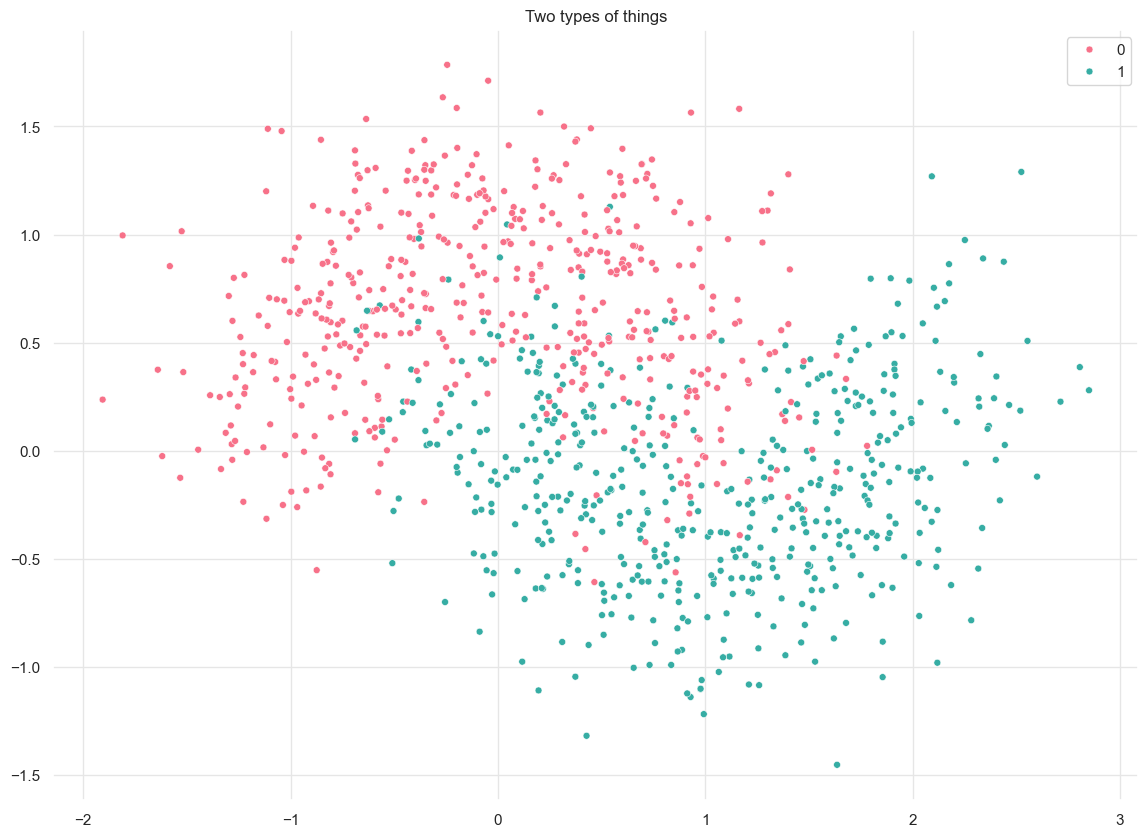

In [3]:
sb.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, s=25, palette="husl")\
  .set_title("Two types of things")
# set the figsize to (12, 8) for a better view
sb.set(rc={'figure.figsize':(14,10)})
sb.set_style(rc={'axes.facecolor':'white', 'grid.color': '.9', 'grid.linestyle': u'-'})
plt.show()

**c. Splitting the dataset:**  

In [4]:
# unfortunately, I couldn't use my own Knn as scikit runs some
# checking on the input data that I didn't want to implement
from sklearn.neighbors import KNeighborsClassifier as Knn

# get the random starting indices for each subset
random_indices = np.random.randint(0, 899, 3)
X_subset = []
y_subset = []

# get the 100 points following each starting index
for i in random_indices:
  X_subset.append(X_train[i:i+100])
  y_subset.append(y_train[i:i+100])

KNN_classifiers = [Knn(1), Knn(25), Knn(50)]

**d. Plotting the decision boundaries:**

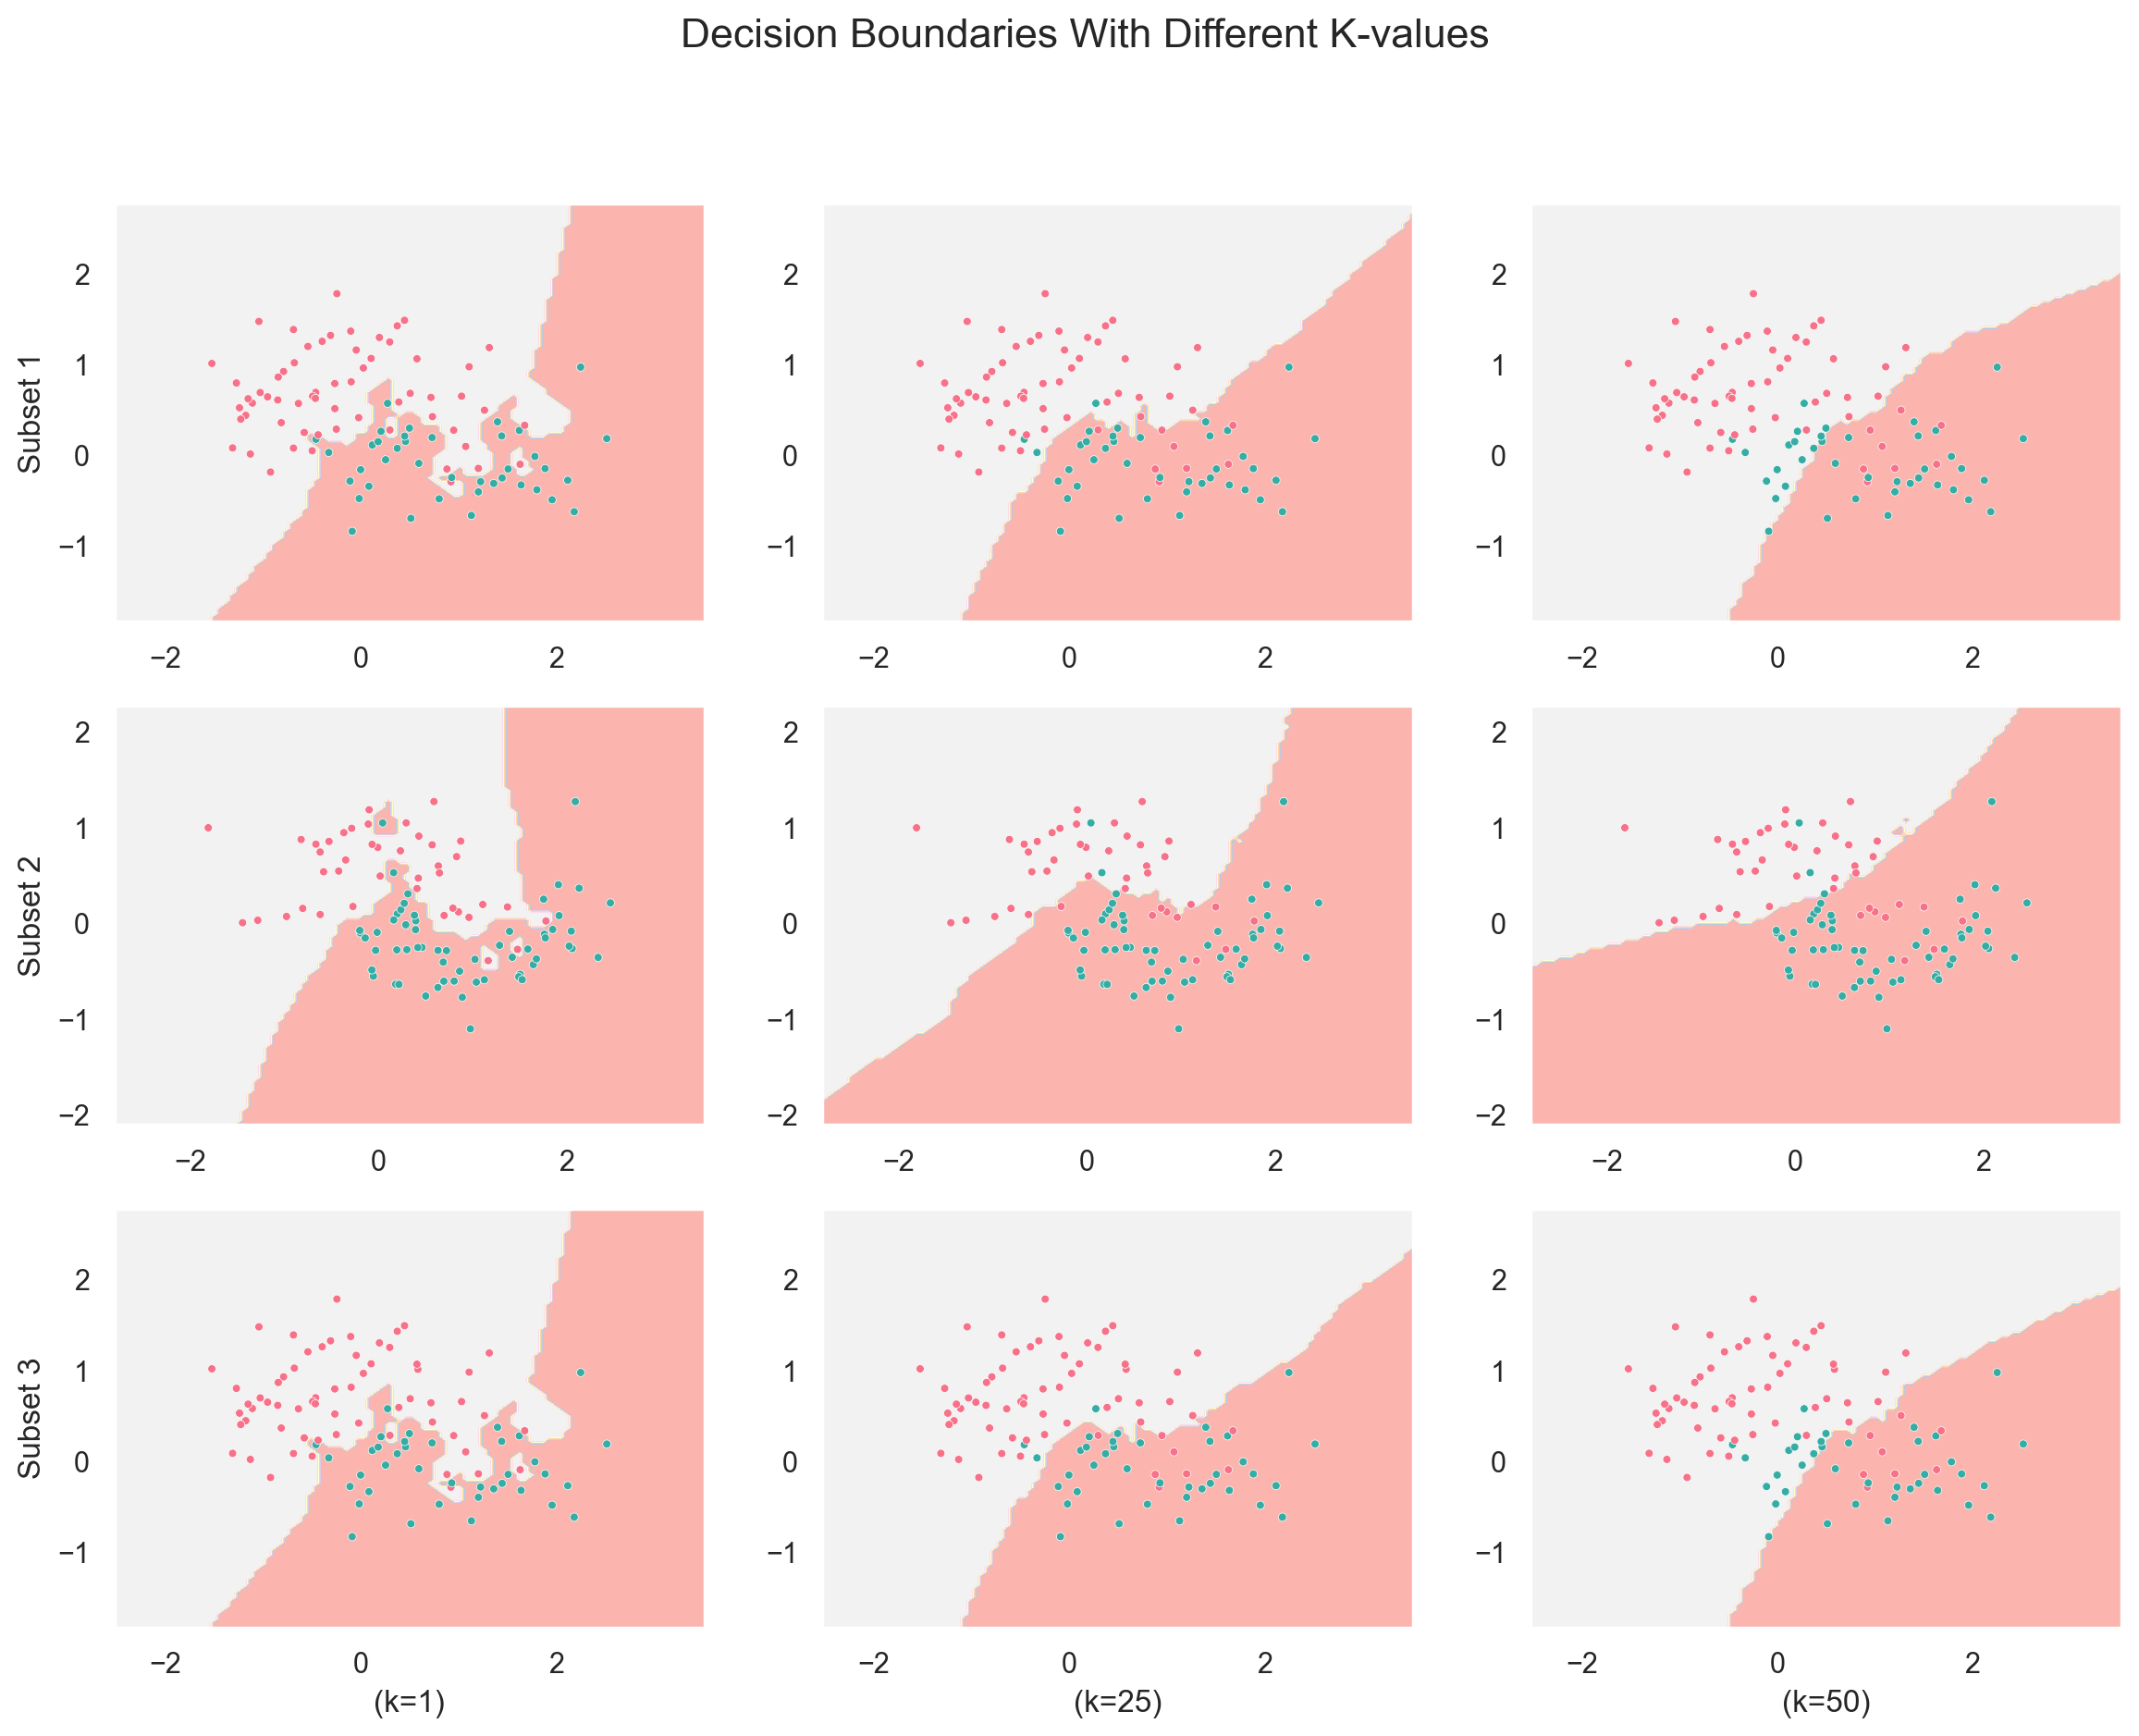

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(14, 10), dpi=200)

# Train a KNN classifier on each subset of data and plot the decision boundary
for i in range(3):
    for j in range(3):
        knn = KNN_classifiers[j]
        knn.fit(X_subset[i], y_subset[i])
        # Create a DecisionBoundaryDisplay object with the 
        # decision boundary for the current classifier
        display = DecisionBoundaryDisplay.\
            from_estimator(knn, X=X_subset[i], response_method='predict')
        # Plot the decision boundary in the corresponding subplot
        display.plot(ax=axs[i, j], cmap='Pastel1_r', alpha=1);
        plt.close()
        
        # overlay the scatterplot of the data on top of
        # the decision boundary plot
        sb.scatterplot(x=X_subset[i][:,0], y=X_subset[i][:,1],\
            hue=y_subset[i], palette="husl", s=10, ax=axs[i, j], legend=False)

# Adjust the layout of the subplots and add titles and labels
fig.suptitle("Decision Boundaries With Different K-values", fontsize=16)
for i in range(3):
    axs[i, 0].set_ylabel("Subset %d" % (i + 1))
    axs[2, i].set_xlabel("(k=%d)" % KNN_classifiers[i].n_neighbors)

plt.show()

**e. Observations:**

The decision boundaries in the first column are the most complex, and do the best job of separating the data into their respective classes. As the K-value of the classifiers increases, the decision boundaries become more linear and less complex. The decision boundaries in the third column are the least complex, and do the worst job of separating the data.

**f. Bias-variance tradeoff:**

In the case of the K-nearest neighbors algorithm, a low $k$ value results in a high variance, and a high $k$ value results in a high bias. This is because a low $k$ value results in a more complex decision boundary, which is more likely to overfit the test data. A high $k$ value results in a less complex decision boundary, which is more likely to underfit the test data.

It's imperative to find a balance between the two, as a model that is too complex will overfit, and a model that is too simple will underfit. 

---

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER:**

**a. Generating the test dataset:**  

In [6]:
X_test, y_test = datasets.make_moons(n_samples=1000, noise=0.35)

**b. Training the classifiers and plotting the classification errors:**  

In [7]:
error = np.array([])
error_train = np.array([])
for i in range(500):
  knn = Knn(i+1)
  knn.fit(X_train, y_train)
  y_hat = knn.predict(X_test)
  y_hat_train = knn.predict(X_train)
  error = np.append(error, (sum(y_test != y_hat) / len(y_test)))
  error_train = np.append(error_train, \
                (sum(y_train != y_hat_train) / len(y_train)))

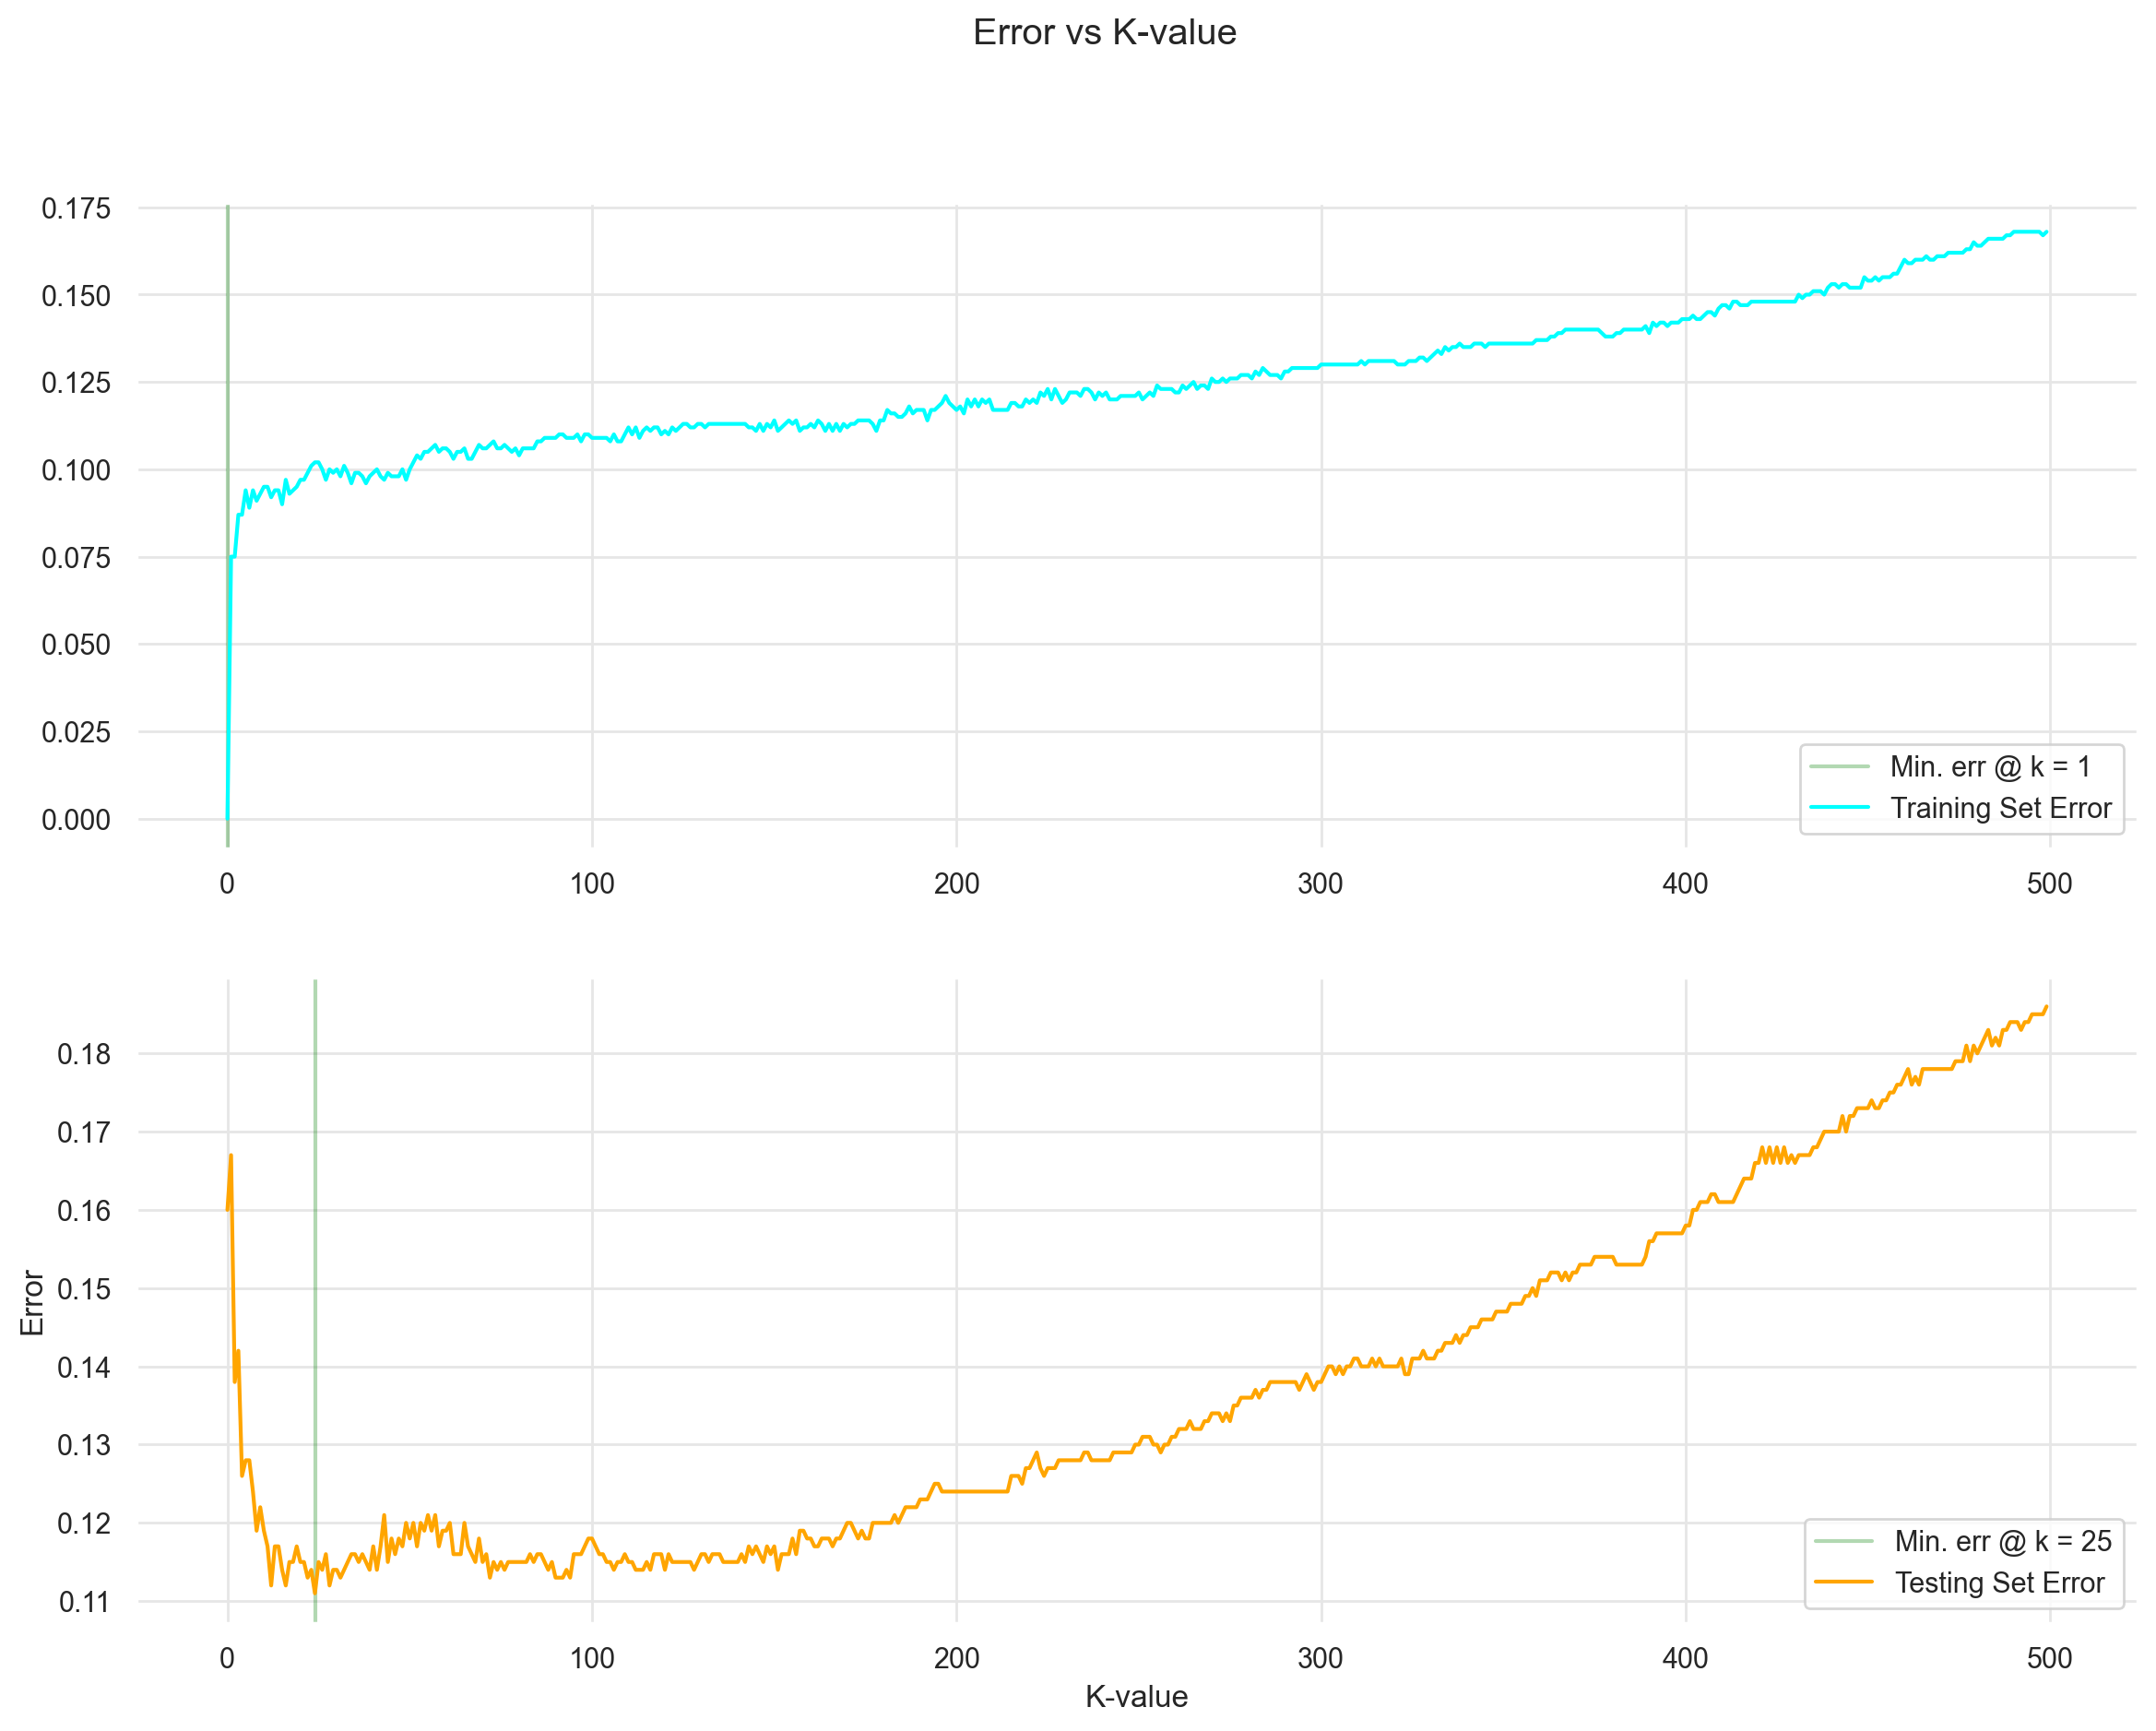

In [8]:
fig, axs = plt.subplots(2, 1 , figsize=(14, 10), dpi=200)

# show the x_tick where error is smallest
axs[0].axvline(np.argmin(error_train), color='green', alpha=0.3, \
            label='Min. err @ k = ' + str(np.argmin(error_train)+1))
# plot training error on first subplot
axs[0].plot(error_train, color='cyan', label="Training Set Error")
axs[0].legend()
# plot testing error on second subplot
axs[1].axvline(np.argmin(error), color='green', alpha=0.3, \
            label='Min. err @ k = ' + str(np.argmin(error)+1))
axs[1].plot(error, color='orange', label='Testing Set Error')
axs[1].legend()
plt.xlabel("K-value")
plt.ylabel("Error")
fig.suptitle("Error vs K-value")

plt.show()

**c. Observations:**

When evaluated on the training dataset, I can see that the error starts at $0$, when the $k$ value is exactly $1$. This makes perfect sense, as when $k = 1$, each point in the dataset is its own nearest neighbor, and thus there will be no misclassification. As the $k$ value increases, the error rate increases, as the model becomes less flexible and more biased.  

On the test dataset, the error rate starts quite high on the low values of $k$, and then quickly decreases as the $k$ value increases, and reaches a minimum error at $k = 25$. After this point, the error rate increases again, as the model becomes less flexible and more biased. The specific $k$ value at which the error rate is minimized is dependent upon the dataset. 

**d. High bias vs. high variance $k$ values:**

Low $k$ values represent high variance; high $k$ values represent high bias. Using a low $k$ value will result in a great fit on training data, but high likelihood of overfitting to test data due to high variance. Using a high $k$ value on the other hand results in a poorer fit to training data, and a higher likelihood of underfitting to test data due to high bias. It's necessary to locate a sweet spot between the two.

**e. Optimal $k$ value:**

When it comes to evaluating on training data, the optimal value is $k = 1$, as I stated above. On the test data, in this particular case, the optimal $k$ value was $k = 25$. From my understanding, the optimal $k$ value for any given dataset is dependent upon the dataset itself. However, from reading online it seems that $k = \lfloor\sqrt{n}\rfloor$ is a good rule of thumb as a starting point for locating an optimal value of $k$, and it appears to hold in this case, since $\lfloor\sqrt{1000}\rfloor \approx 31 \approx 25$. 

**f. Flexibility of other models:**

Flexibility is dependent upon hyperparameters that are unique to each type of model. The relevant hyperparameter when it comes to KNN is the $k$ value, in polynomial fitting it could be the degree of the polynomial, in decision trees it would be the depth of the tree, etc.

---

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**:

**a. Scatterplot:**  

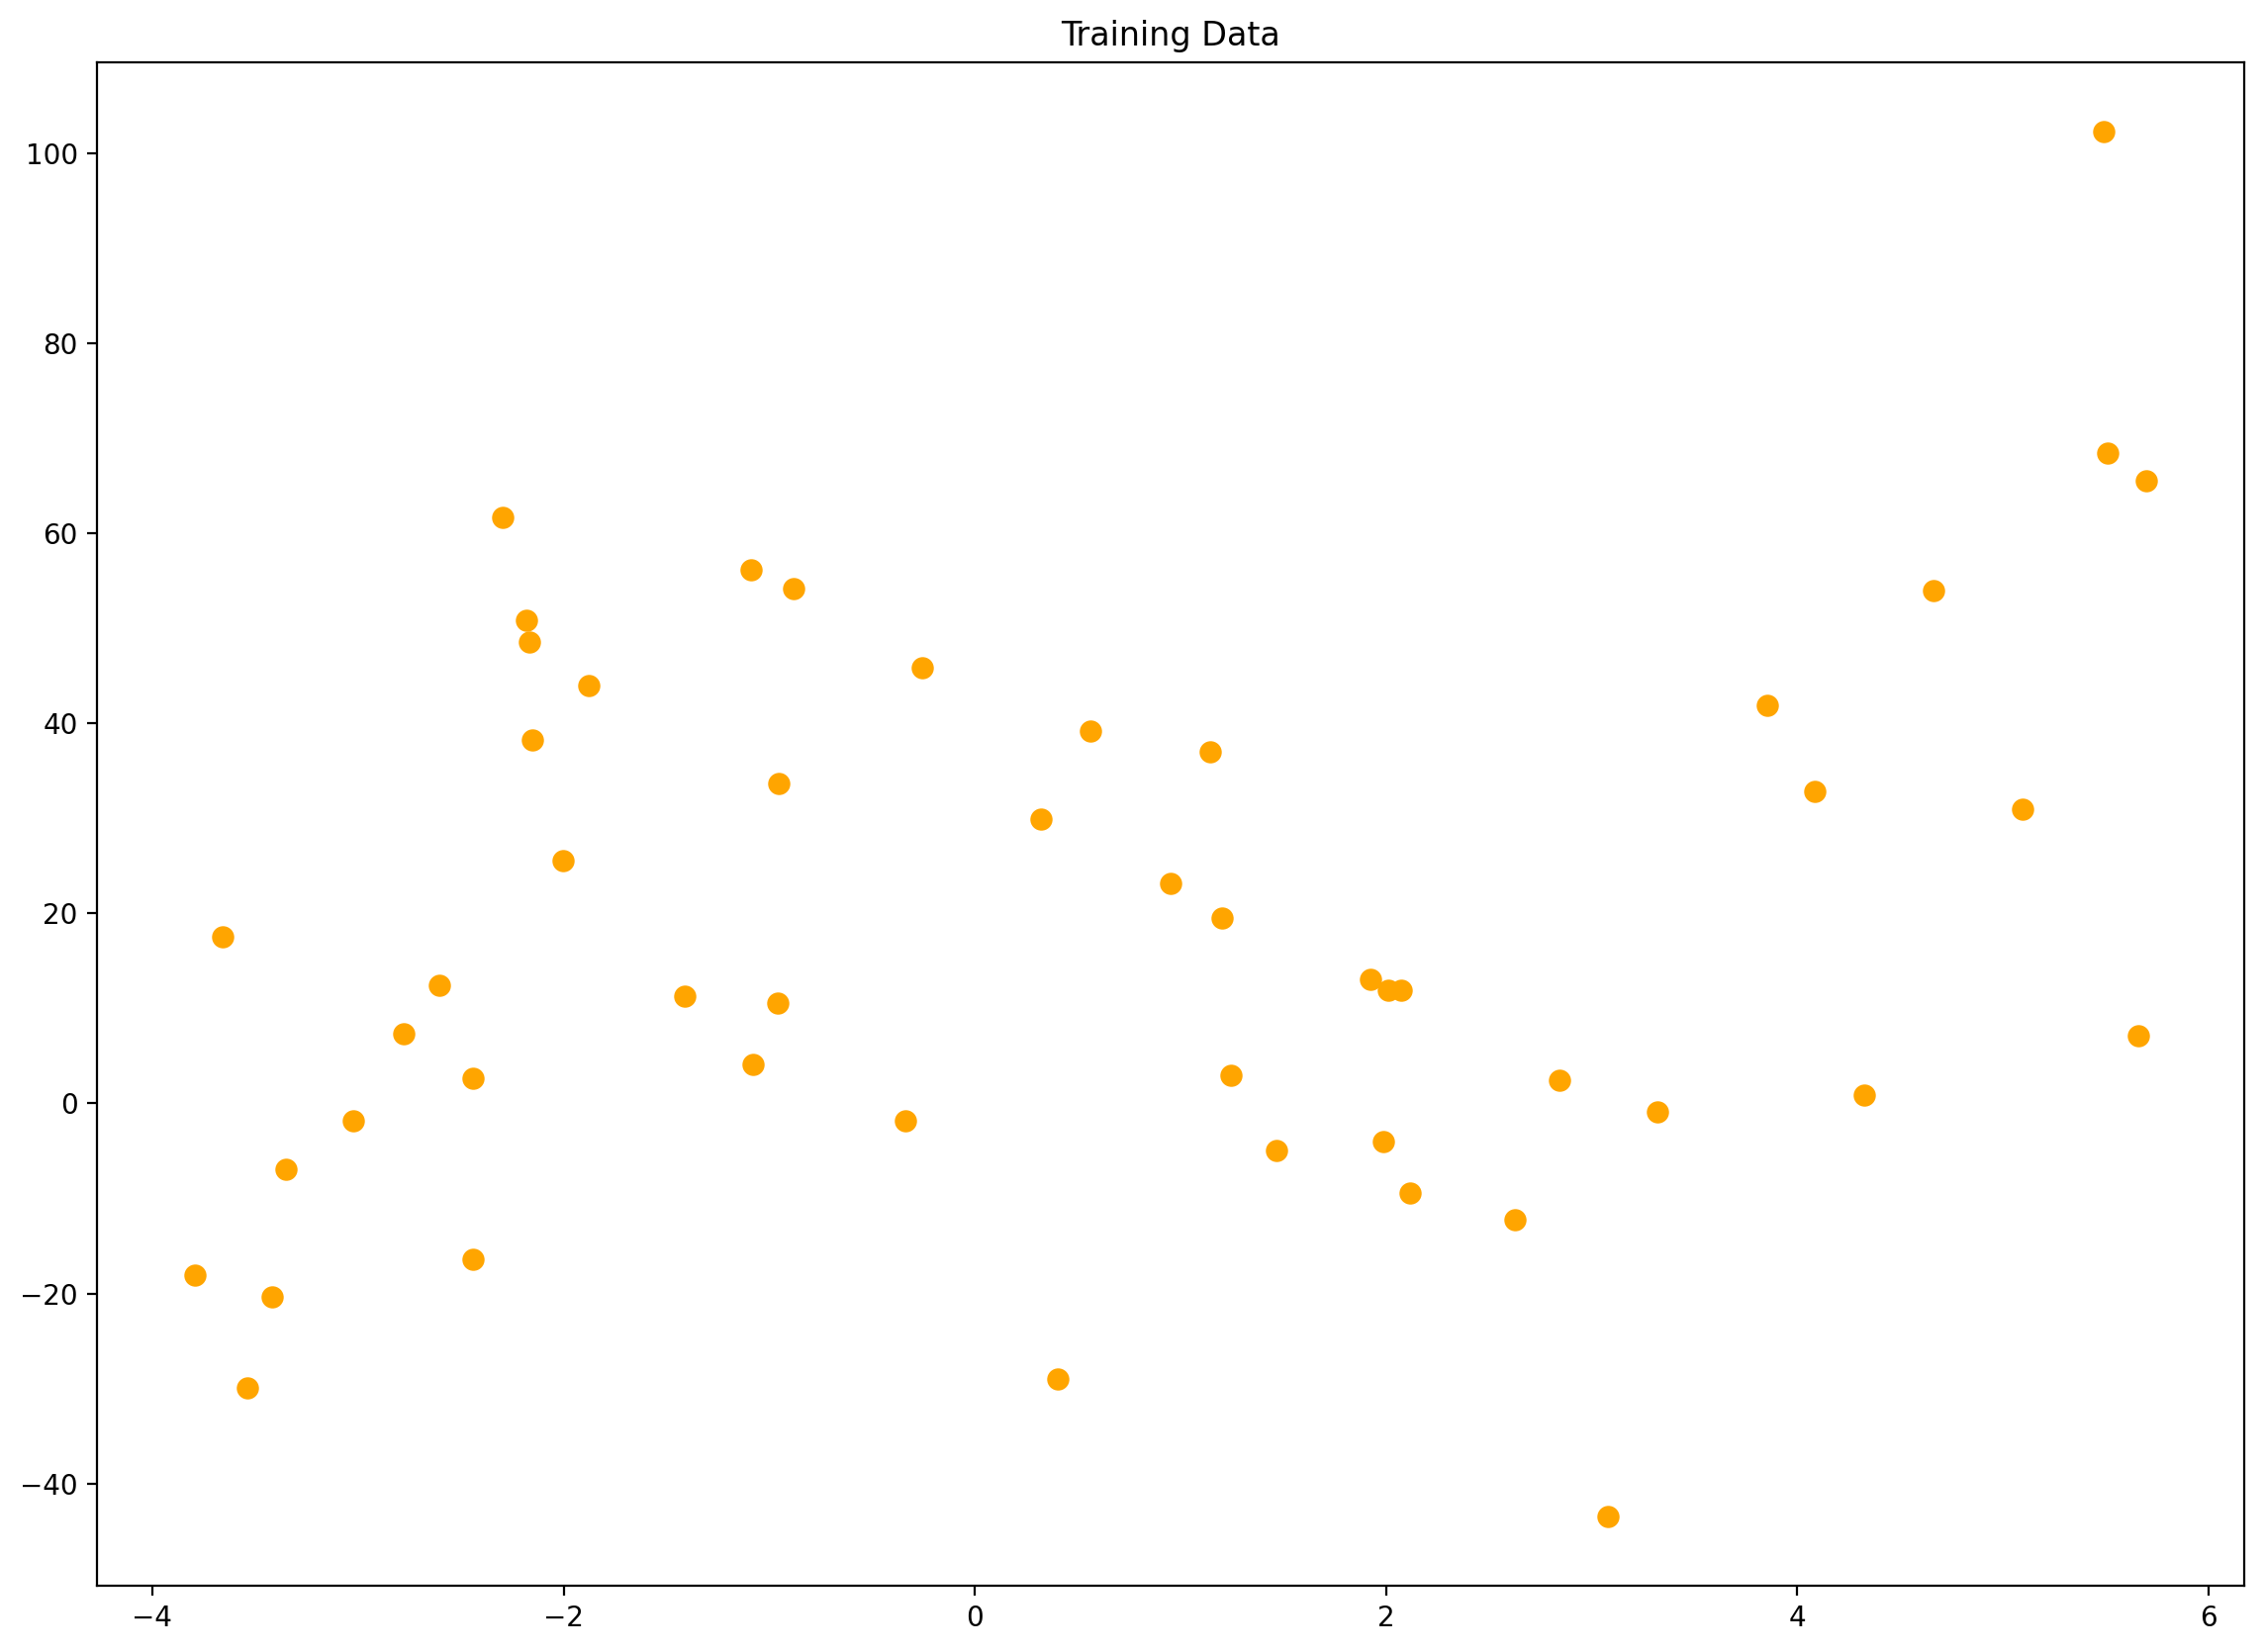

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.metrics import mean_squared_error as mse
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('A2_Q7_train.csv')
test = pd.read_csv('A2_Q7_test.csv')

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values.reshape(-1, 1)
y_test = test.y.values.reshape(-1, 1)

plt.figure(figsize=(14, 10), dpi=200)
plt.scatter(x_train, y_train, s=50, marker='o', color="orange")
plt.title("Training Data")
plt.show()

**b. Estimating a linear regression model:**  

In [2]:
# get the training data
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# instantiate the linear regression model
lr = LinearRegression()
# fit the model to the training data
lr.fit(x_train, y_train)
# get the predictions for the training data
y_hat_linear = lr.predict(x_train)

r_squared_linear = lr.score(x_train, y_train)
print(f"R^2: {r_squared_linear}")
mse_linear = mse(y_train, y_hat_linear)
print(f"MSE: {mse_linear}")

# get the coefficients 
coefficient = lr.coef_[0][0]
intercept = lr.intercept_[0]
# Build the equation string
equation = f"y = {intercept:.4f} + {coefficient:.4f}x"
print(equation)

R^2: 0.06486123304769698
MSE: 791.4167471701106
y = 17.2049 + 2.5907x


The formula for the simple linear regression model here is:
$$y = 17.2049 + 2.5907x$$

With an $R^2$ value of $0.065$ and a mean squared error of $791.417$ on the training data.

**c. Estimating a multiple regression model:**  

In [3]:
lrg = LinearRegression()

poly = pf(5)
x_range = np.linspace(np.min(x_train), np.max(x_train), 1000).reshape(-1, 1)
x_train_transformed = poly.fit_transform(x_train)
x_range_transformed = poly.fit_transform(x_range)
mlr = lrg.fit(x_train_transformed, y_train)
y_hat = mlr.predict(x_train_transformed)
# get the coefficients and intercept for the polynomial model
coefficients = mlr.coef_[0][1:] 
intercept = mlr.intercept_[0]
# build the equation string
equation = f"y = {intercept:.4f}"
for i, coef in enumerate(coefficients): equation += f"+ {coef:.4f}x^{i+1} "
print(equation)
r_squared = mlr.score(x_train_transformed, y_train)
print(f"R^2: {r_squared}")
mean_squared_error = mse(y_train, y_hat)
print(f"MSE: {mean_squared_error}")

y = 26.5402+ -13.7991x^1 + -3.7591x^2 + 1.8063x^3 + 0.1264x^4 + -0.0391x^5 
R^2: 0.42107252401752626
MSE: 489.95177622961376


The equation for the polynomial model here is:
$$
y = 26.5402 - 13.7991x - 3.7591x^2 + 1.8063x^3 + 0.1264x^4 - 0.0391x^5 
$$

With an $R^2$ value of $0.421$, and a mean squared error of $489.952$ on the training data.

**d. Plotting the models:**  

Desmos R^2: 0.7214680630566188
Desmos MSE: 1560.870583428418


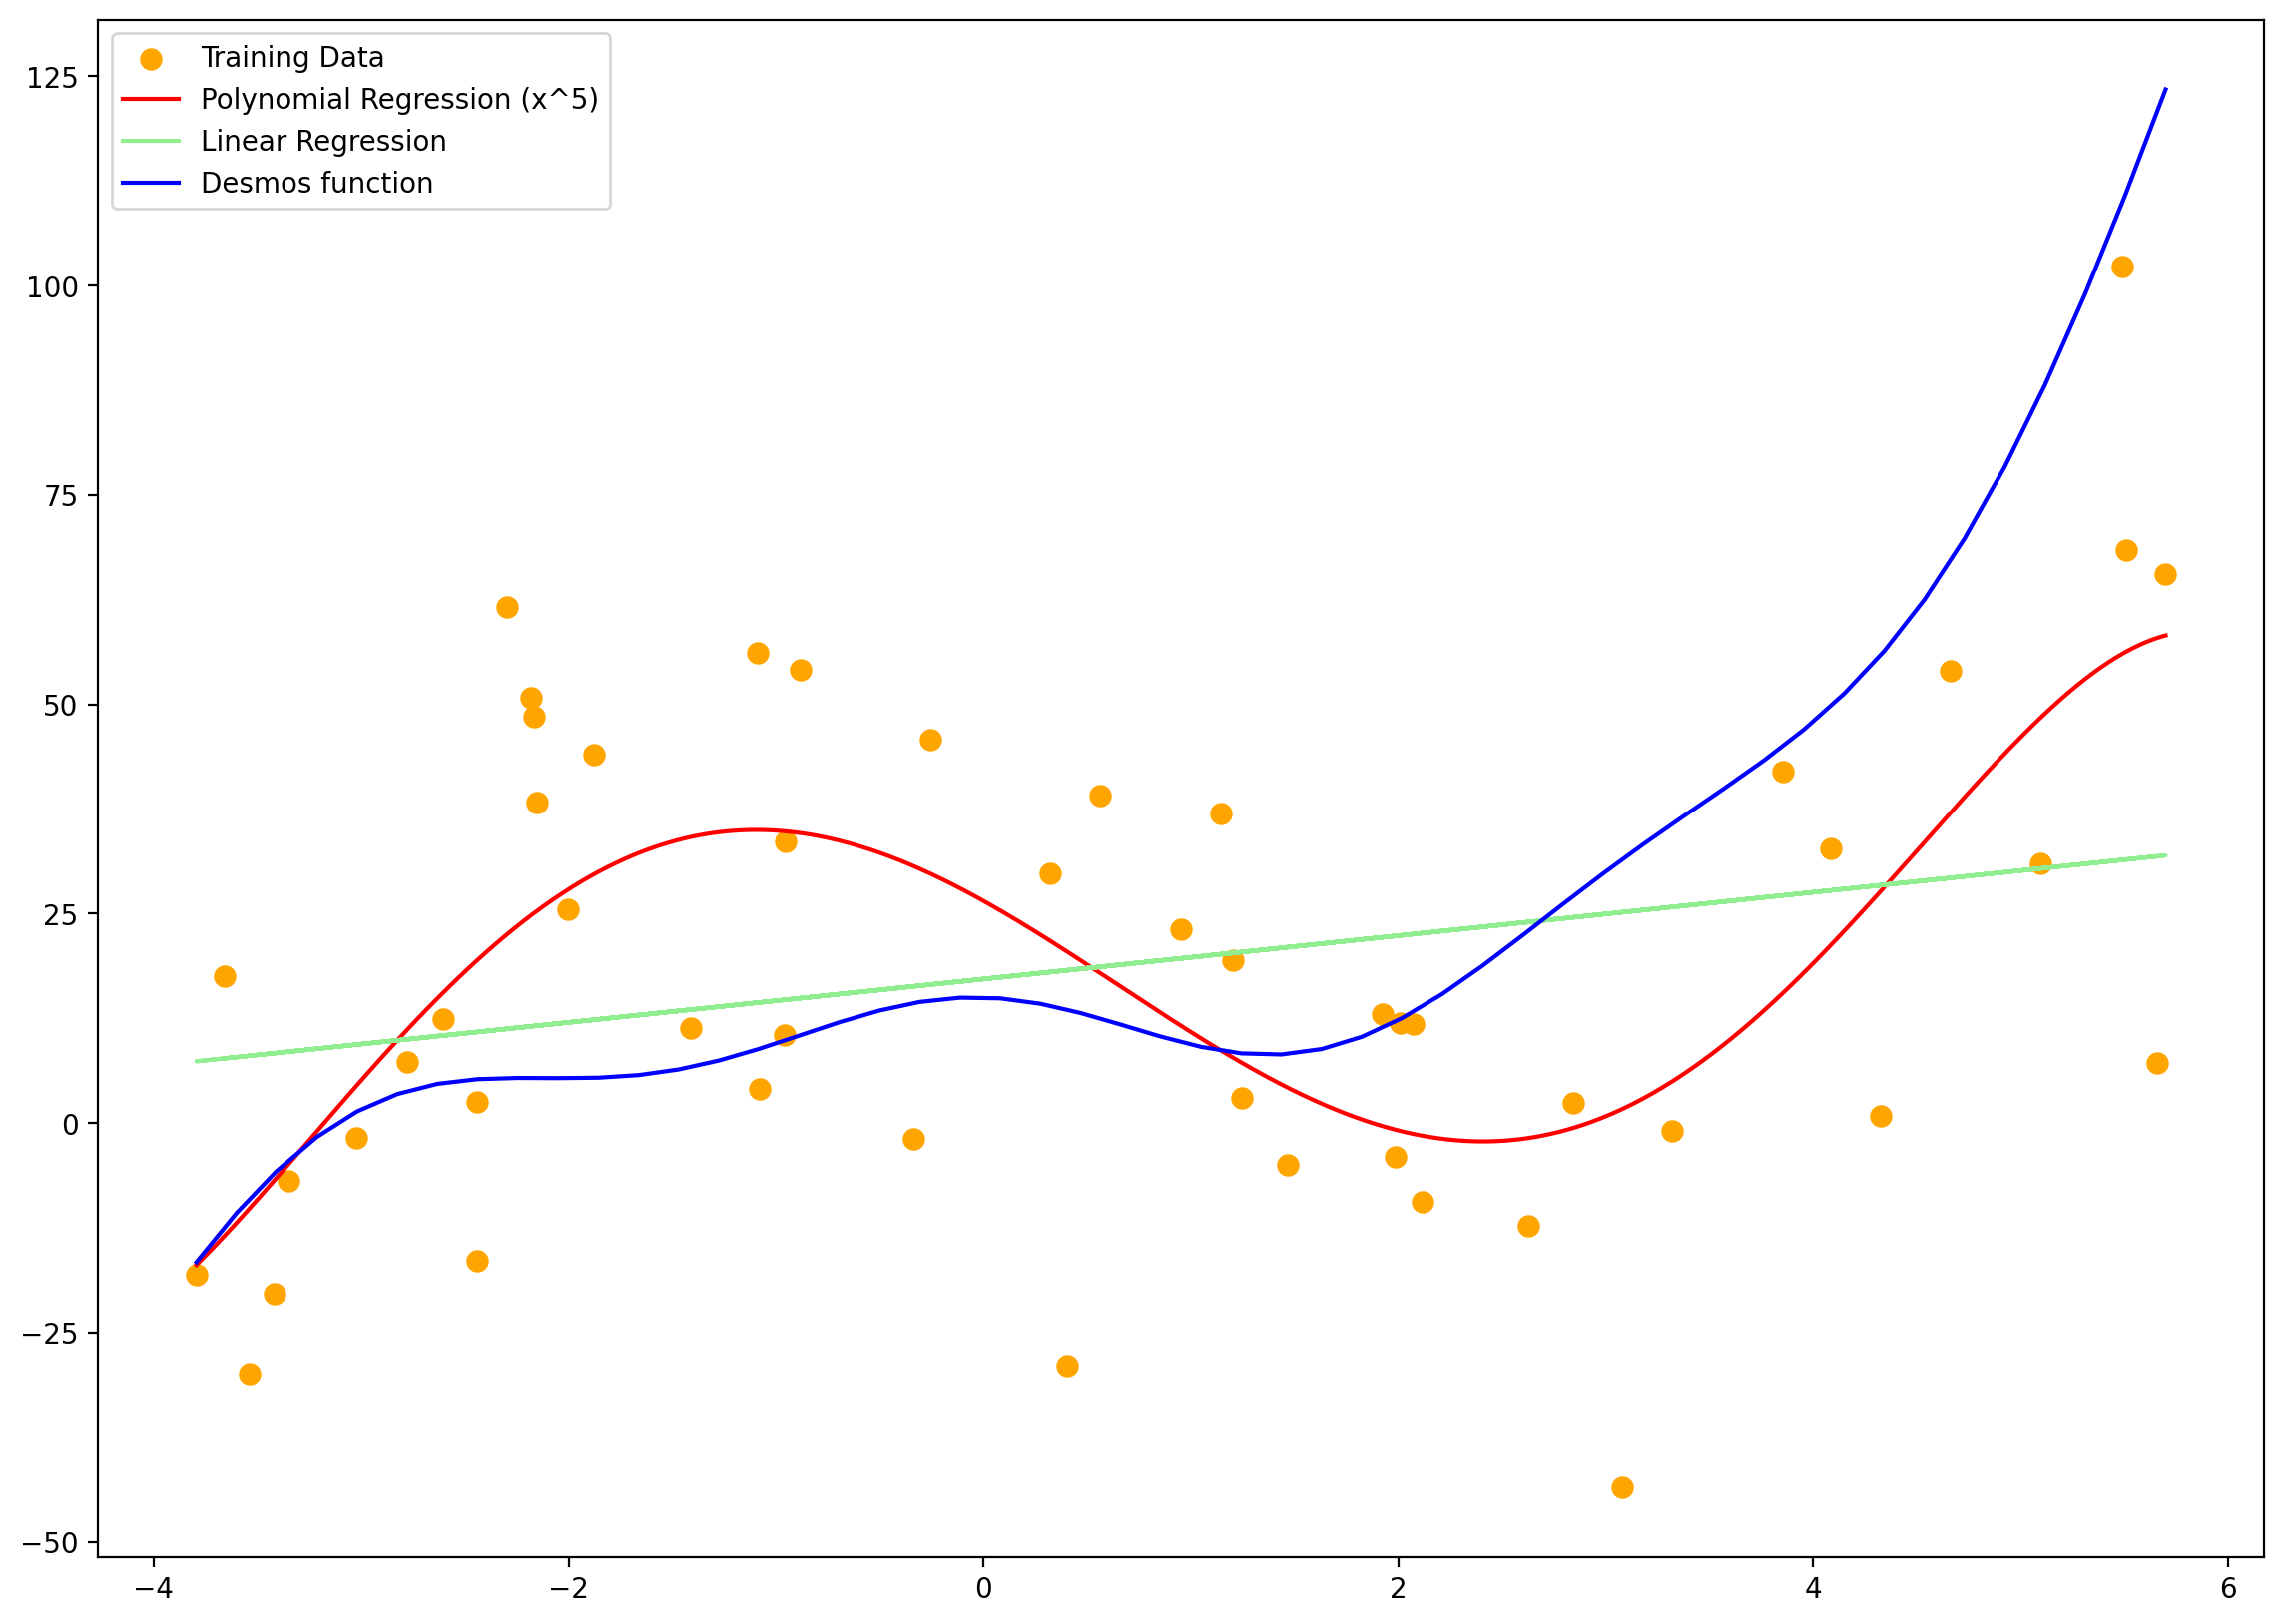

In [4]:
# the first block of code below introduces the desmos function that
# I designed to match the training dataset
# prepare x values in range
temp = LinearRegression()
x = np.linspace(np.min(x_train), np.max(x_train), 50).reshape(-1, 1)
# the equation
y = (10 + (3/5) * x**3 + 4 * np.cos(2 * x) + (1/9) * (x - 3)**2).reshape(-1, 1)
lrd = temp.fit(x, y)
# get R^2 and MSE for the desmos function
r_squared_desmos = lrd.score(x, y)
print(f"Desmos R^2: {r_squared_desmos}")
y_hat_desmos = lrd.predict(x)
mse_desmos = mse(y_train, y_hat_desmos)
print(f"Desmos MSE: {mse_desmos}")

# plot everything
plt.figure(figsize=(14, 10), dpi=200)
plt.scatter(x_train, y_train, s=50, marker='o', color="orange", \
          label='Training Data')
plt.plot(x_range, mlr.predict(x_range_transformed), color='red', \
         label='Polynomial Regression (x^5)')
plt.plot(x_train, y_hat_linear, color='lightgreen', \
         label='Linear Regression')
plt.plot(x, y, color='blue', label='Desmos function')
plt.legend()
plt.show()

The equation I came up with (in blue) by playing around on Desmos is:
$$
y\ =\ 10\ +\ 4\cos2x\ +\ \frac{1}{9}\left(x-3\right)^{2} + \frac{3}{5}x^{3}
$$

This ended up having an $R^2$ value of $0.721$, and a mean squared error of $1560.870$ on the training data.
I quit trying to improve the equation after I realized that I could use the `PolynomialFeatures` function in SciKit to get an automatically generated polynomial model. It's interesting that the $R^2$ value is much higher than that of the linear model.

**e. Evaluating the models on test data:**  

Linear Regression MSE: 1116.6632365616088
Polynomial Regression MSE: 858.7573472440483
Desmos MSE: 1944.3325128701133

Linear Regression R^2: -0.132899284725984
Polynomial Regression R^2: 0.12875650187818333
Desmos R^2: -0.9726026979115086


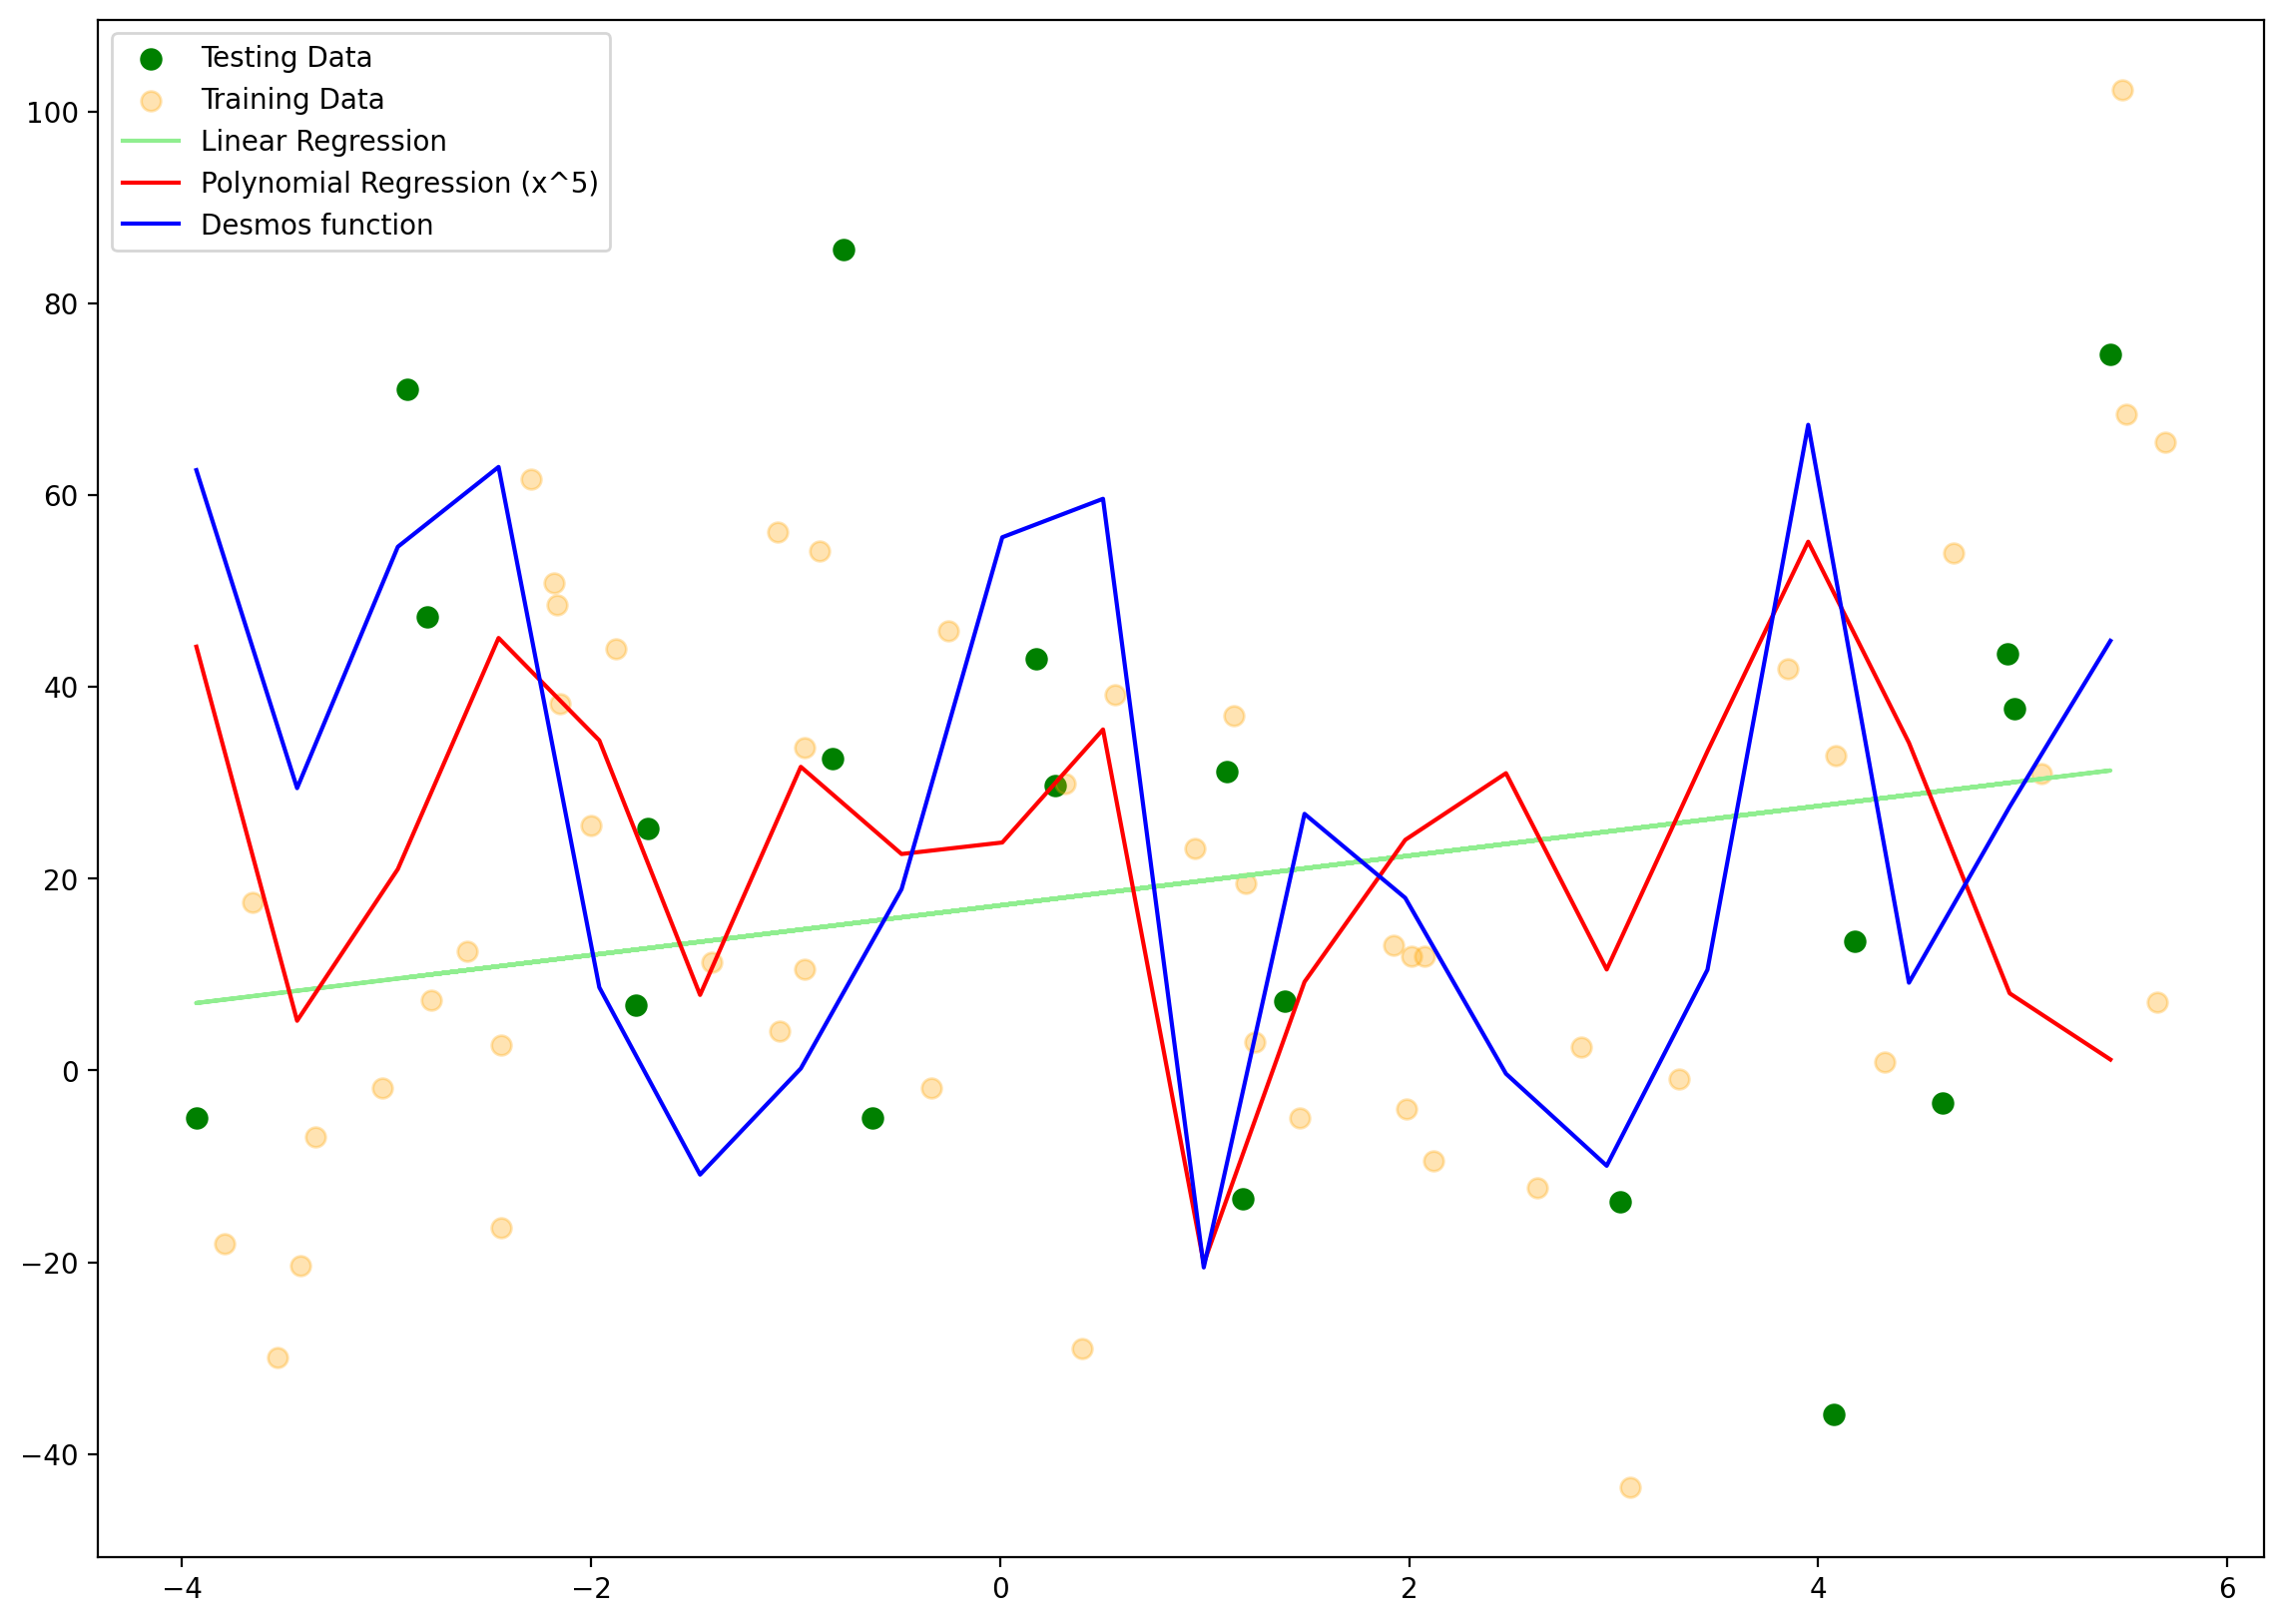

In [15]:
x_range_plt = np.linspace(np.min(x_test), np.max(x_test), 20).reshape(-1, 1)

# get the predictions for the linear regression model
y_hat_linear = lr.predict(x_test)
y_hat_poly = mlr.predict(poly.fit_transform(x_test))
y_hat_desmos = lrd.predict(x_test)

mse_linear = mse(y_test, y_hat_linear)
mse_poly = mse(y_test, y_hat_poly)
mse_desmos = mse(y_test, y_hat_desmos)

r_squared_linear = lr.score(x_test, y_test)
r_squared_poly = mlr.score(poly.fit_transform(x_test), y_test)
r_squared_desmos = lrd.score(x_test, y_test)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Desmos MSE: {mse_desmos}\n")

print(f"Linear Regression R^2: {r_squared_linear}")
print(f"Polynomial Regression R^2: {r_squared_poly}")
print(f"Desmos R^2: {r_squared_desmos}")


plt.figure(figsize=(14, 10), dpi=200)
plt.scatter(x_test, y_test, s=50, marker='o', color="green", \
          label='Testing Data')
plt.scatter(x_train, y_train, s=50, marker='o', color="orange", \
          label='Training Data', alpha=0.3)
plt.plot(x_test, y_hat_linear, color='lightgreen', \
          label='Linear Regression')
plt.plot(x_range_plt, y_hat_poly, color='red', \
          label='Polynomial Regression (x^5)')
plt.plot(x_range_plt, y_hat_desmos, color='blue', \
          label='Desmos function')
plt.legend()
plt.show()

|                              	| Training 	|      	| Test 	|       	|
|------------------------------	|----------	|------	|------	|-------	|
| **Curves**                       	| **MSE**      	| **R^2**  	| **MSE**  	| **R^2**   	|
| **Linear Model**                 	| 791      	| 0.06 	| 1117 	| -0.13 	|
| **Polynomial Model**             	| 490      	| 0.42 	| 858  	| 0.13  	|
| **Multiple regression (desmos)** 	| 1560     	| 0.71 	| 1944 	| -0.97 	|

**f. Model performance:**  

Welp, seems like they're all quite terrible.

**Training data:**  
The multiple regression model I came up with on Desmos has the highest $R^2$ value, indicating a good fit to the training data, but the highest mean squared error as well. 

The linear model has an atrocious $R^2$ value, indicating a terrible fit on the training data, but a lower MSE value than the multiple regression model.

The polynomial model has a decent $R^2$ value, indicating a decent fit on the training data, and the lowest MSE out of the bunch.

**Test data:**  
This is where everything breaks down. My multiple regression model now has an $R^2$ value of almost $-1$, indicating that it is extremely overfitted and does not generalize well to unseen data. It also has the highest MSE value, indicating that it is the worst model for the test data.

The Linear model also has a negative $R^2$ value at $-0.13$, indicating that there exists a straight line that fits the test data better than it does, which is expected. It has the second highest MSE value at 1117, and is the second worst model for the test data.

The polynomial model is the only one which has a positive $R^2$ value, indicating that it is the only model that fits the test data better than a straight line. It also has the lowest MSE value at 858, and is the best model for the test data.

**g. Significantly different test data:**  

If the test data were to be significantly different from the training data, then the exercise of training a model on the training dataset would be pointless. The models would be runnning blind, attempting to fit to a dataset that is completely different from the one it was trained on. This would result in a model that is not only overfitted, but also completely useless. Accuracies would be even lower than they are now, and the models would be completely unable to generalize to unseen data.

It's critical to use a training dataset which is representative of the data that the model will be used on.